### librarys

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN,SMOTE,BorderlineSMOTE
from collections import Counter
from sklearn.metrics import f1_score

import joblib

from sklearn.metrics import confusion_matrix, accuracy_score,balanced_accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import time

data = pd.read_csv('WSN-DS.csv')
# Select 20 random rows for testing
test_data = data.groupby("Attack type").sample(n=4, random_state=42)
test_data.to_csv("test_data.csv", index=False)
test_data.iloc[:,:18].to_csv("lets_test_data.csv", index=False)
data = data.drop(test_data.index)
data.shape


(374641, 19)

#### what the data locks like

In [2]:
data.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


#### OUR DATA DESCRIBTION

In [3]:
data.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746410e+05,374641.000000,374641.000000,3.746410e+05,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000,374641.000000
mean,2.749672e+05,1064.728786,0.115732,2.749783e+05,22.600231,0.267509,6.940111,0.779933,0.737431,0.288922,0.747478,9.687231,44.859682,73.890202,4.568403,22.561339,2.498058,0.305639
std,3.899060e+05,899.635528,0.319904,3.899187e+05,21.955765,2.060184,7.043860,0.414292,4.691470,2.754567,0.434459,14.681776,42.574510,230.249503,19.674122,50.260075,2.407346,0.669422
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [4]:

data=data.drop_duplicates()
d_work = data.copy()
d_multi_output = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365768 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               365768 non-null  int64  
 1    Time             365768 non-null  int64  
 2    Is_CH            365768 non-null  int64  
 3    who CH           365768 non-null  int64  
 4    Dist_To_CH       365768 non-null  float64
 5    ADV_S            365768 non-null  int64  
 6    ADV_R            365768 non-null  int64  
 7    JOIN_S           365768 non-null  int64  
 8    JOIN_R           365768 non-null  int64  
 9    SCH_S            365768 non-null  int64  
 10   SCH_R            365768 non-null  int64  
 11  Rank              365768 non-null  int64  
 12   DATA_S           365768 non-null  int64  
 13   DATA_R           365768 non-null  int64  
 14   Data_Sent_To_BS  365768 non-null  int64  
 15   dist_CH_To_BS    365768 non-null  float64
 16   send_code        365768 

#### marking the data as a normal "0" and attack "1" data 

In [5]:



def convert_attack_type(df):
    # we create a new column with binary values
    df['attack_binary'] = df['Attack type'].apply(lambda x: 0 if x == 'Normal' else 1)
    return df

convert_attack_type(d_work)
d_work = d_work.drop(["Attack type"], axis = 1)
d_work.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,attack_binary
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,0
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,0
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,0
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,0
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,0


In [6]:
d_work.describe()
# percentige of normal "0" and attack "1" in our data

binary_counts = d_work['attack_binary'].value_counts(normalize=True) * 100
print(binary_counts)
print(f"Percentage of 0s: {binary_counts.get(0, 0):.2f}%")
print(f"Percentage of 1s: {binary_counts.get(1, 0):.2f}%")


attack_binary
0    90.777761
1     9.222239
Name: proportion, dtype: float64
Percentage of 0s: 90.78%
Percentage of 1s: 9.22%


In [7]:
d_work.info()


<class 'pandas.core.frame.DataFrame'>
Index: 365768 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               365768 non-null  int64  
 1    Time             365768 non-null  int64  
 2    Is_CH            365768 non-null  int64  
 3    who CH           365768 non-null  int64  
 4    Dist_To_CH       365768 non-null  float64
 5    ADV_S            365768 non-null  int64  
 6    ADV_R            365768 non-null  int64  
 7    JOIN_S           365768 non-null  int64  
 8    JOIN_R           365768 non-null  int64  
 9    SCH_S            365768 non-null  int64  
 10   SCH_R            365768 non-null  int64  
 11  Rank              365768 non-null  int64  
 12   DATA_S           365768 non-null  int64  
 13   DATA_R           365768 non-null  int64  
 14   Data_Sent_To_BS  365768 non-null  int64  
 15   dist_CH_To_BS    365768 non-null  float64
 16   send_code        365768 

In [8]:
X = d_work.iloc[:, :18]
corr = X.corr()
y = d_work.iloc[:, 18]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
corr.head()

Shape of X: (365768, 18)
Shape of y: (365768,)


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
id,1.000000,0.681811,0.190912,1.000000,-0.326700,0.046585,-0.017197,-0.558298,-0.045970,-0.022099,-0.507472,-0.238612,-0.174520,0.061978,0.086245,0.478175,-0.285436,0.006369
Time,0.681811,1.000000,0.286662,0.681825,-0.346676,0.013873,0.076043,-0.495320,-0.038938,0.000751,-0.431969,-0.312862,-0.034912,0.079233,0.058018,0.342924,-0.233830,0.029237
Is_CH,0.190912,0.286662,1.000000,0.190919,-0.375889,0.356366,0.403448,-0.695642,0.437184,0.292600,-0.613378,-0.239938,-0.384032,0.296368,0.368289,0.319147,-0.379863,0.238867
who CH,1.000000,0.681825,0.190919,1.000000,-0.326713,0.046584,-0.017194,-0.558316,-0.045971,-0.022099,-0.507490,-0.238621,-0.174521,0.061994,0.086249,0.478190,-0.285442,0.006378
Dist_To_CH,-0.326700,-0.346676,-0.375889,-0.326713,1.000000,-0.133954,-0.018479,0.540349,-0.164218,-0.109985,0.450459,0.380740,-0.013789,-0.312239,-0.214846,-0.412814,0.190538,-0.180331


<Axes: >

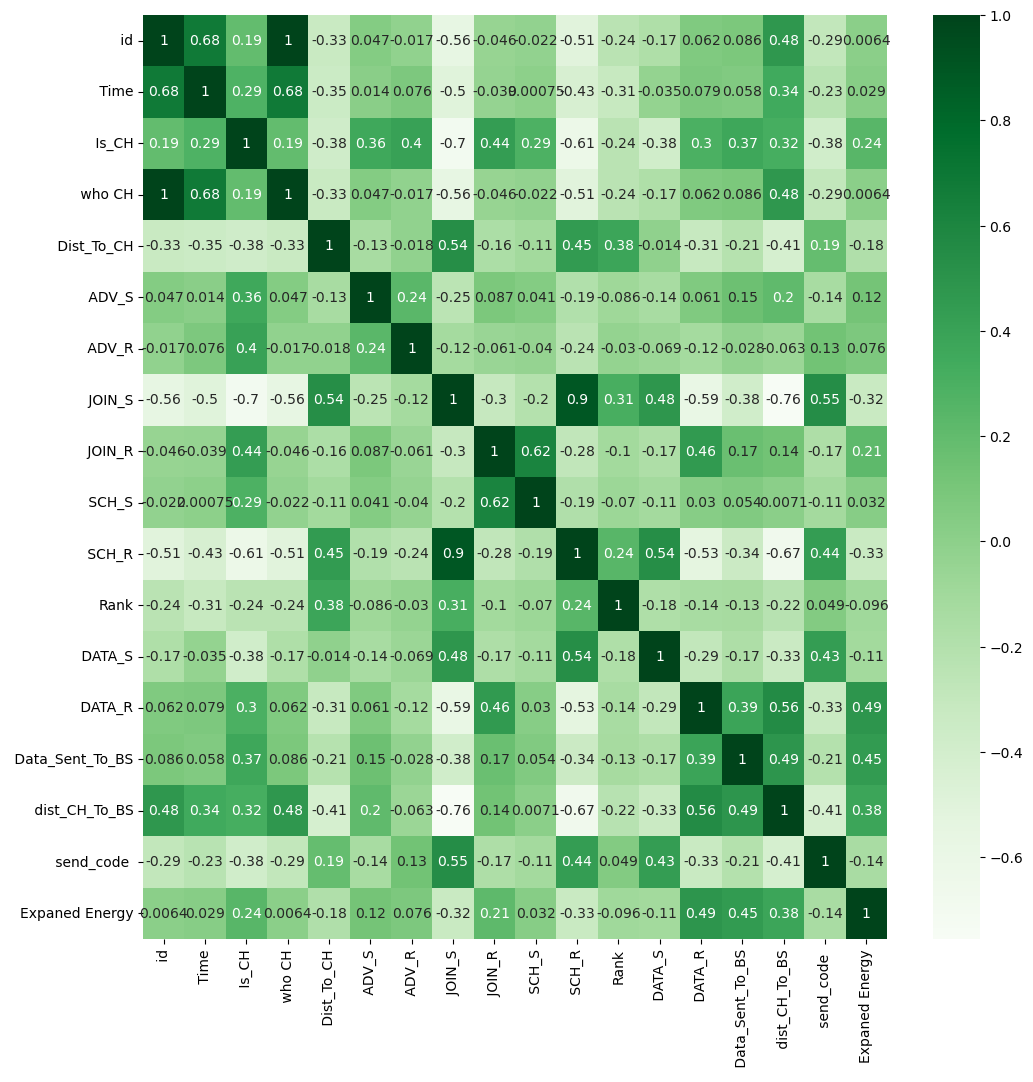

In [9]:
plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap='Greens', annot=True)

In [10]:
#from the corelation heatmap map we conclude that we can drop the who CH columen and the SCH_R columen
columens_drop = [" who CH"," SCH_R"]
X=X.drop(columns = columens_drop)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Balancing data using undersampling and smote :

In [12]:
# Print original distribution
print("Original distribution:")
original_dist = pd.Series(y_train).value_counts(normalize=True) * 100
print(original_dist)

# Step 1: Undersample the majority class (Normal - class 0) to about 60%
# Calculate target counts
attack_classes_count = sum(1 for label in y_train if label != 0)  # Count all attack samples

desired_percentage = 0.60

normal_target = int(attack_classes_count / (1 - desired_percentage) * desired_percentage)  # This makes Normal about 60% after undersampling

undersampling_strategy = {
    0: normal_target,
    1: sum(1 for label in y_train if label == 1)  # Keep all attacks samples
}

# Apply random undersampling
rus = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("\nDistribution after undersampling:")
under_dist = pd.Series(y_train_under).value_counts(normalize=True) * 100
print(under_dist)


Original distribution:
attack_binary
0    90.751297
1     9.248703
Name: proportion, dtype: float64

Distribution after undersampling:
attack_binary
0    59.999704
1    40.000296
Name: proportion, dtype: float64


In [13]:
b_smote = BorderlineSMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = b_smote.fit_resample(X_train_under, y_train_under)

print("\nDistribution after BorderlineSMOTE:")
final_dist = pd.Series(y_resampled).value_counts(normalize=True) * 100
print(final_dist)


Distribution after BorderlineSMOTE:
attack_binary
0    50.0
1    50.0
Name: proportion, dtype: float64


##### This part shown the evolution of balancing our dataset (original Distribution ,after undersampling , and after BorderlineSMOTE(oversampling method)):

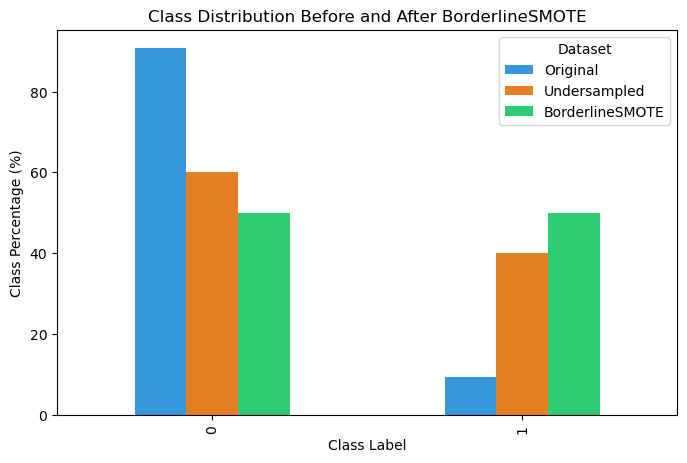

In [14]:
# Calculate distributions
original_dist = pd.Series(y_train).value_counts(normalize=True) * 100
under_dist = pd.Series(y_train_under).value_counts(normalize=True) * 100
final_dist = pd.Series(y_resampled).value_counts(normalize=True) * 100

#DataFrame for visualization
dist_df = pd.DataFrame({
    "Original": original_dist,
    "Undersampled": under_dist,
    "BorderlineSMOTE": final_dist
}).sort_index()

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
dist_df.plot(kind="bar", ax=ax, color=["#3498db", "#e67e22", "#2ecc71"])

# Labels and title
ax.set_ylabel("Class Percentage (%)")
ax.set_xlabel("Class Label")
ax.set_title("Class Distribution Before and After BorderlineSMOTE")
ax.legend(title="Dataset")

# Show plot
plt.show()

In [15]:
X_train=X_resampled
y_train=y_resampled

### Feature selection Methods (Random Forest and PCA ):

In [16]:


# Train Random Forest
rf_bin = RandomForestClassifier()
start_time = time.time()

rf_bin.fit(X_train, y_train)

training_time_rf = (time.time() - start_time) / 60
print(f'training time: {training_time_rf}')


# Get feature importance
importance = rf_bin.feature_importances_
feature_names = X_train.columns

# Print feature importance
for name, score in zip(feature_names, importance):
    print(f"{name}: {score:.4f}")
    

training time: 0.10340836842854818
 id: 0.0163
 Time: 0.0095
 Is_CH: 0.1751
 Dist_To_CH: 0.0492
 ADV_S: 0.2728
 ADV_R: 0.0152
 JOIN_S: 0.0836
 JOIN_R: 0.0152
 SCH_S: 0.0074
Rank: 0.1008
 DATA_S: 0.1542
 DATA_R: 0.0087
 Data_Sent_To_BS: 0.0155
 dist_CH_To_BS: 0.0053
 send_code : 0.0505
Expaned Energy: 0.0208


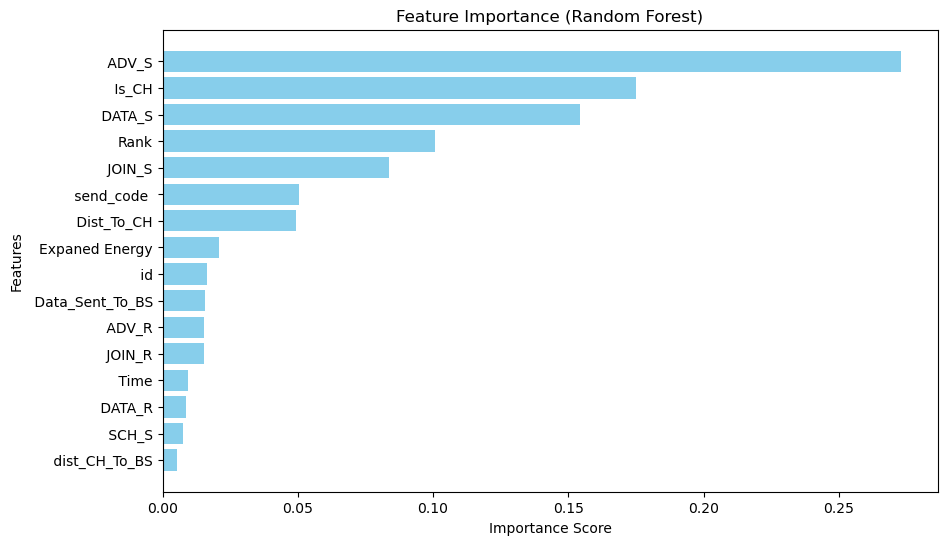

Selected Features: [' Is_CH', ' Dist_To_CH', ' ADV_S', ' JOIN_S', 'Rank', ' DATA_S', ' send_code ']


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting feature importances for better visualization
features_sorted = sorted(zip(X.columns, rf_bin.feature_importances_), key=lambda x: x[1], reverse=True)
feature_names, importance_values = zip(*features_sorted)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

# Filter features with importance > threshold (e.g., 0.03)
important_features = [feature for feature, importance in zip(X.columns, rf_bin.feature_importances_) if importance > 0.03]
X_selected = X[important_features]

print("Selected Features:", important_features)

In [18]:
X_train=X_train[important_features]
X_test=X_test[important_features]

### scaling using MinMaxScaler :

In [19]:
scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.transform(X_test)

#shape the data in to a frame
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_ts_scaled = pd.DataFrame(X_ts_scaled, columns=X_train.columns)
X_tr_scaled

,Is_CH,Dist_To_CH,ADV_S,JOIN_S,Rank,DATA_S,send_code
0,0.0,0.014343,0.000000,1.0,0.181818,0.228216,0.133333
1,0.0,0.064053,0.000000,1.0,0.010101,0.373444,0.400000
2,0.0,0.179742,0.000000,1.0,0.030303,0.165975,0.133333
3,0.0,0.051190,0.000000,1.0,0.292929,0.095436,0.066667
4,0.0,0.155556,0.000000,1.0,0.454545,0.112033,0.466667
...,...,...,...,...,...,...,...
81183,1.0,0.000000,0.010309,0.0,0.000000,0.000000,0.000000
81184,1.0,0.000000,0.010309,0.0,0.000000,0.000000,0.000000
81185,1.0,0.000000,0.010309,0.0,0.000000,0.000000,0.000000
81186,1.0,0.000000,0.010309,0.0,0.000000,0.000000,0.000000


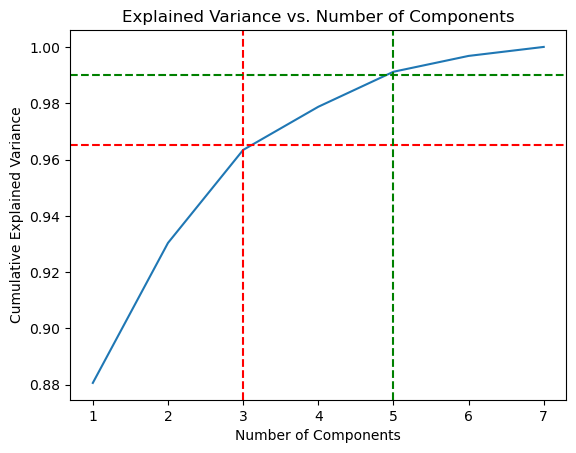

In [20]:
pca = PCA()  # specifing the number of components after locking at the Explained Variance vs. Number of Components 
pca.fit(X_tr_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance)
plt.axhline(y=0.965, color='r', linestyle='--')
plt.axvline(x=3, color='r', linestyle='--') 
plt.axhline(y=0.99, color='g', linestyle='--')
plt.axvline(x=5, color='g', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

n_components = 5

In [21]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_tr_scaled)
X_test_pca = pca.transform(X_ts_scaled)
pca_df_train = pd.DataFrame(X_train_pca, columns=[f'PC_{i+1}' for i in range(n_components)])
pca_df_test = pd.DataFrame(X_test_pca, columns=[f'PC_{i+1}' for i in range(n_components)])

print("Final Shapes:")
print("X_train PCA:", pca_df_train.shape)
print("X_test PCA:", pca_df_test.shape)

Final Shapes:
X_train PCA: (81188, 5)
X_test PCA: (73154, 5)


### Models Training

##### 1-Using logistic Regression

In [22]:


LGRb_model = LogisticRegression()  
start_time = time.time()

LGRb_model.fit(pca_df_train, y_train)

training_time_LGR = (time.time() - start_time) / 60

y_pred_LGR = LGRb_model.predict(pca_df_test)
accuracy_LGR = accuracy_score(y_test, y_pred_LGR)
balanced_accuracy_LGR = balanced_accuracy_score(y_test, y_pred_LGR)
print(f"Accuracy with PCA: {accuracy_LGR:.2%}")
print(f"balanced accuracy with PCA: {balanced_accuracy_LGR:.2%}")
print(f'training time: {training_time_LGR:.4f}minutes')


Accuracy with PCA: 97.40%
balanced accuracy with PCA: 97.96%
training time: 0.0006minutes


##### 2-Using SVM non-linear Model

In [23]:
from sklearn.svm import SVC
SVMb_classifier = SVC(kernel = 'rbf', random_state = 0)
start_time = time.time()
SVMb_classifier.fit(pca_df_train, y_train)
training_time_svm = (time.time() - start_time) / 60
print(f'training time: {training_time_svm}')
y_pred_svm = SVMb_classifier.predict(pca_df_test)


training time: 0.8176648139953613


In [24]:
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
accuracy_score(y_test,y_pred_svm)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
balanced_accuracy_svm = balanced_accuracy_score(y_test, y_pred_svm)


[[64675  1810]
 [   91  6578]]


In [25]:
print(f"Accuracy with PCA: {accuracy_svm:.2%}")
print(f"Accuracy with PCA: {balanced_accuracy_svm:.2%}")


Accuracy with PCA: 97.40%
Accuracy with PCA: 97.96%


##### 3-using decicion tree 

In [26]:
dtb_model = DecisionTreeClassifier(max_depth=5,criterion ="entropy")
start_time = time.time()
dtb_model.fit(X_tr_scaled, y_train)
training_time_dt = (time.time() - start_time) / 60
print(f'training time: {training_time_dt:.4f}minutes')
y_pred_dtb = dtb_model.predict(X_ts_scaled)
accuracy_dtb = accuracy_score(y_test, y_pred_dtb)
balanced_accuracy_dtb = balanced_accuracy_score(y_test, y_pred_dtb)
print(f"Model Accuracy: {accuracy_dtb:.2f}")
print(f"Model balance Accuracy: {balanced_accuracy_dtb:.2f}")

training time: 0.0006minutes
Model Accuracy: 0.97
Model balance Accuracy: 0.98


##### 4-Random_Forest_binair

In [27]:
rmb_model = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy', random_state=42)

# Train the model
start_time = time.time()
rmb_model.fit(X_tr_scaled, y_train)
training_time_rf = (time.time() - start_time) / 60
print(f'Training time: {training_time_rf:.4f} minutes')

# Make predictions
y_pred_rf = rmb_model.predict(X_ts_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

# Display results
print(f"Model Accuracy: {accuracy_rf:.2f}")
print(f"Model Balanced Accuracy: {balanced_accuracy_rf:.2f}")

Training time: 0.0228 minutes
Model Accuracy: 0.97
Model Balanced Accuracy: 0.98


In [28]:

f1_LGR = f1_score(y_test, y_pred_LGR, average="weighted")
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")
f1_dtb = f1_score(y_test, y_pred_dtb, average="weighted")
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")



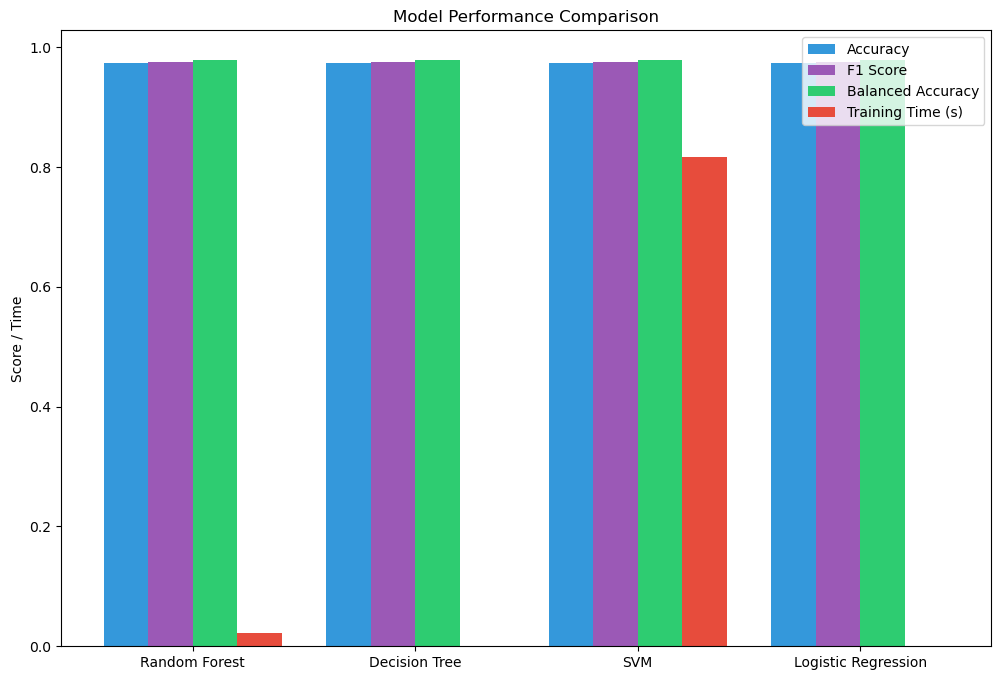

In [29]:



models = ["Random Forest", "Decision Tree", "SVM", "Logistic Regression"]

accuracy = np.array([accuracy_rf, accuracy_dtb, accuracy_svm, accuracy_LGR])
f1_scores = np.array([f1_rf, f1_dtb, f1_svm, f1_LGR])
training_time = np.array([training_time_rf, training_time_dt, training_time_svm, training_time_LGR])
balanced_accuracy = np.array([balanced_accuracy_rf, balanced_accuracy_dtb, balanced_accuracy_svm, balanced_accuracy_LGR])

# Create bar width and positions
x = np.arange(len(models))
width = 0.2  # Adjusted width to fit all bars correctly

# Plot bars
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="#3498db")  # Deep Blue
ax.bar(x - 0.5 * width, f1_scores, width, label="F1 Score", color="#9b59b6")  # Purple
ax.bar(x + 0.5 * width, balanced_accuracy, width, label="Balanced Accuracy", color="#2ecc71")  # Green
ax.bar(x + 1.5 * width, training_time, width, label="Training Time (s)", color="#e74c3c")  # Red
# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("Score / Time")
ax.set_title("Model Performance Comparison")
ax.legend()

# Show plot
plt.show()

In [30]:
joblib.dump(LGRb_model, "ids-detection-models/Logistic_Regression_binair_model.joblib")
joblib.dump(SVMb_classifier, "ids-detection-models/SVM_binair_model.joblib")
joblib.dump(dtb_model, "ids-detection-models/Decision_Tree_binair_model.joblib")
joblib.dump(rmb_model, "ids-detection-models/Random_Forest_binair_model.joblib")

['ids-detection-models/Random_Forest_binair_model.joblib']

### Detecting the type of attack

In [31]:

d_multi_output.drop_duplicates()
categorical_columns = d_multi_output.select_dtypes(include=['object']).columns.tolist()

# Apply OneHotEncoder
encoder = OneHotEncoder( sparse_output=False)
encoded = encoder.fit_transform(d_multi_output[categorical_columns])

# Create a new DataFrame for the one-hot encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Merge encoded columns back with the original data
df_encoded = pd.concat([d_multi_output.drop(columns=categorical_columns), encoded_df], axis=1)

#percentege of eatch attack
percentage_Normal = (df_encoded['Attack type_Normal'].sum() / len(df_encoded['Attack type_Normal'])) * 100
percentage_Flooding = (df_encoded['Attack type_Flooding'].sum() / len(df_encoded['Attack type_Flooding'])) * 100
percentage_Grayhole = (df_encoded['Attack type_Grayhole'].sum() / len(df_encoded['Attack type_Grayhole'])) * 100
percentage_Blackhole = (df_encoded['Attack type_Blackhole'].sum() / len(df_encoded['Attack type_Blackhole'])) * 100
percentage_TDMA = (df_encoded['Attack type_TDMA'].sum() / len(df_encoded['Attack type_TDMA'])) * 100

print(f"Percentage in Normal state:          {percentage_Normal:.2f}%")
print(f"Percentage of Attack type_Grayhole:   {percentage_Grayhole:.2f}%")
print(f"Percentage of Attack type_Blackhole:  {percentage_Blackhole:.2f}%")
print(f"Percentage of Attack type_TDMA:       {percentage_TDMA:.2f}%")
print(f"Percentage of Attack type_Flooding:   {percentage_Flooding:.2f}%")

corolation_matrix = df_encoded.corr()

df_encoded.shape


Percentage in Normal state:          89.13%
Percentage of Attack type_Grayhole:   3.73%
Percentage of Attack type_Blackhole:  2.70%
Percentage of Attack type_TDMA:       1.78%
Percentage of Attack type_Flooding:   0.85%


(372526, 23)

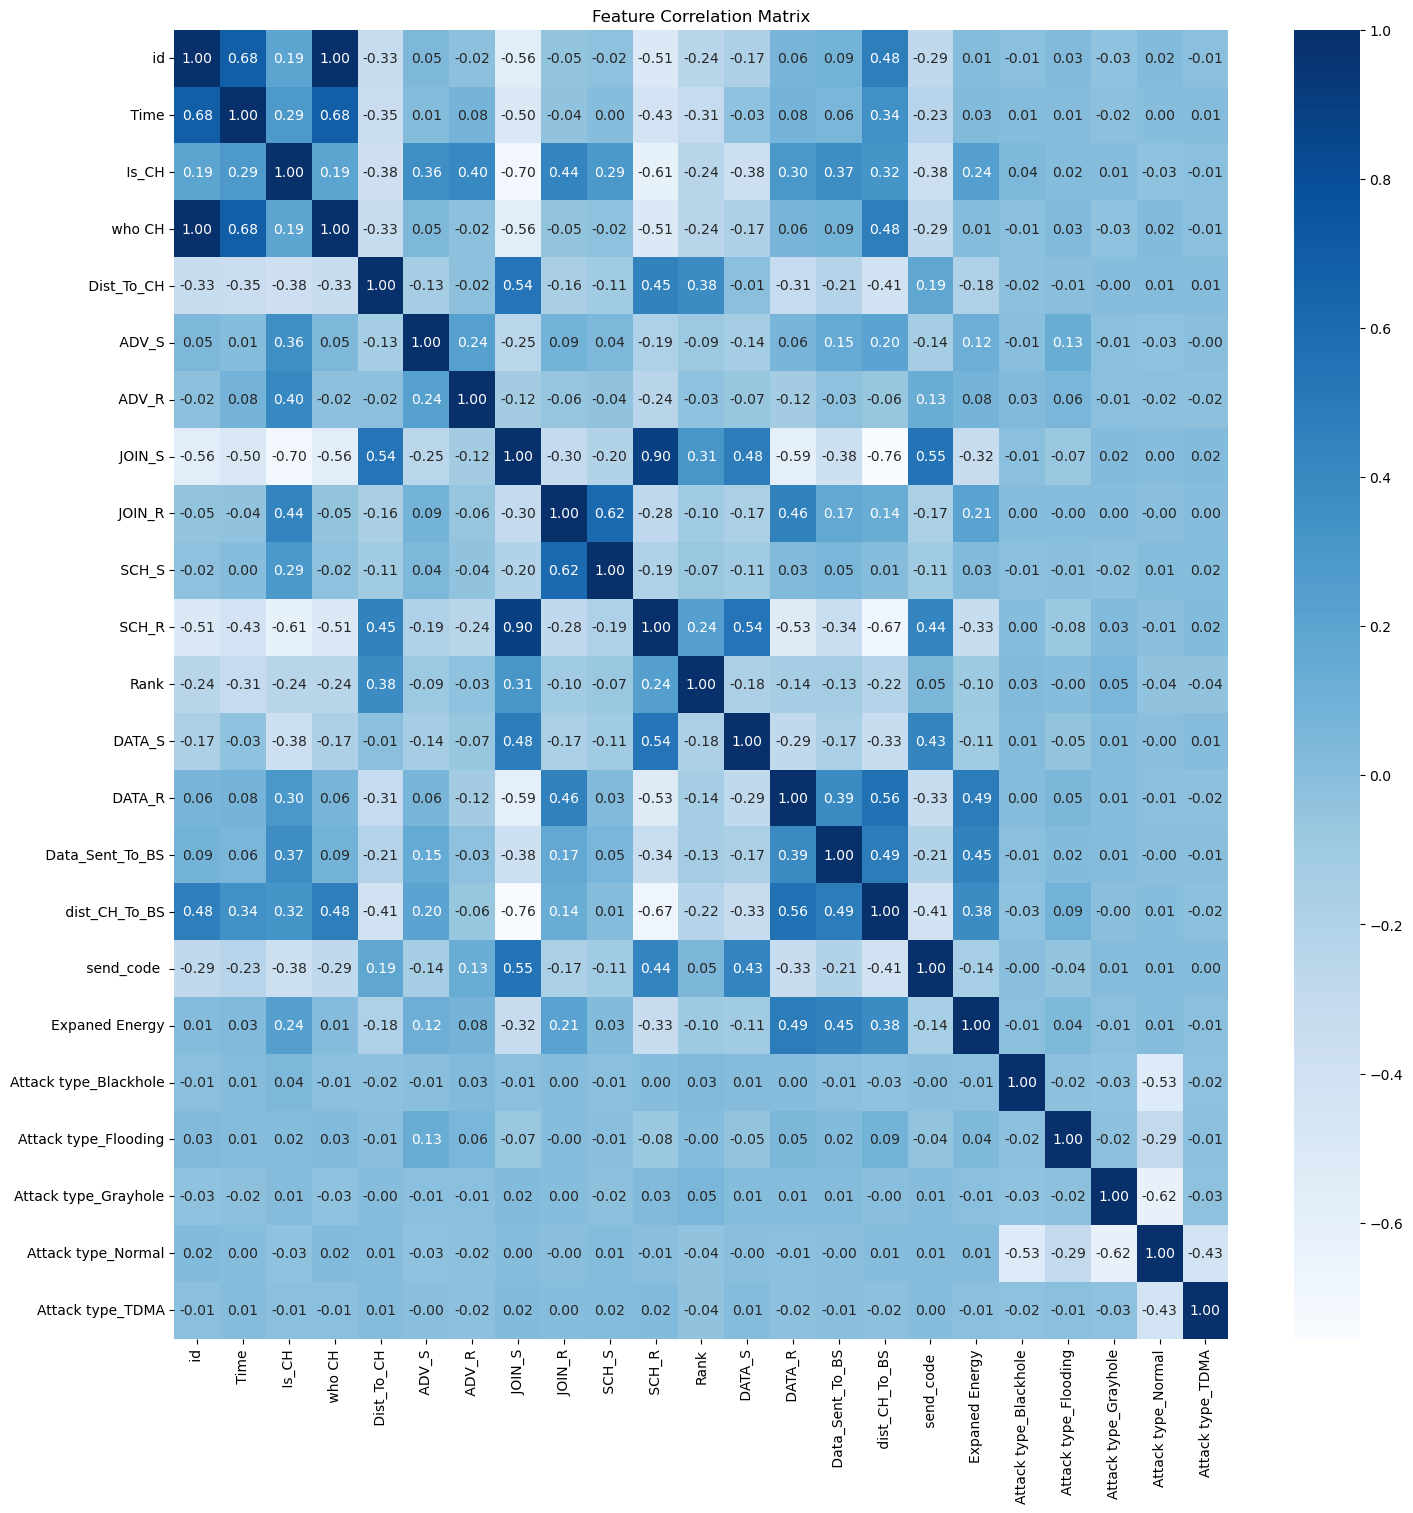

In [32]:
plt.figure(figsize=(17, 17))
sns.heatmap(corolation_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [33]:

X_multi = d_multi_output.iloc[:, :18]
columens_drop = [" who CH"," SCH_R"]
X_multi=X_multi.drop(columns = columens_drop)
y_multi = d_multi_output["Attack type"]
y_multi_encoded = df_encoded[['Attack type_Normal', 'Attack type_Flooding', 'Attack type_Grayhole', 'Attack type_Blackhole', 'Attack type_TDMA']]
print(f'{X_multi.shape}')
print(f'{y_multi.shape}')
print(f'{y_multi_encoded.shape}')


(365768, 16)
(365768,)
(372526, 5)


In [34]:
# Encode the target variable 'Attack type' using LabelEncoder we use this for svm and Gradient Boosting
label_encoder = LabelEncoder()
y_multi = label_encoder.fit_transform(y_multi)

uniqueClasses = np.unique(y_multi)
print(f'unique encoded classes: {uniqueClasses}')

#0 --> Blackhole
#1 --> Flooding
#2 --> Grayhole 
#3 --> Normal
#4 --> TDMA
y_series = pd.Series(y_multi)
attacks_count = y_series.value_counts(normalize=True) * 100
for label in uniqueClasses:
    print(f"Percentage of {label}s: {attacks_count.get(label, 0):.2f}%")

joblib.dump(label_encoder, "label_encoder.pkl")
y_multi

unique encoded classes: [0 1 2 3 4]
Percentage of 0s: 2.75%
Percentage of 1s: 0.86%
Percentage of 2s: 3.80%
Percentage of 3s: 90.78%
Percentage of 4s: 1.81%


array([3, 3, 3, ..., 3, 3, 3])

#### split the data to test and train sets before scaling it to Avoid data leakage

In [35]:
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_series, test_size=0.2, random_state=42)
#Xe_multi_train, Xe_multi_test, ye_multi_train, ye_multi_test = train_test_split(X_multi, y_multi_encoded, test_size=0.2, random_state=42)

#### balancing data

In [36]:
# Print original distribution
print("Original distribution:")
original_dist = pd.Series(y_multi_train).value_counts(normalize=True) * 100
print(original_dist)

# Step 1: Undersample the majority class (Normal - class 3) to about 55%
# Calculate target counts
attack_classes_count = sum(1 for label in y_multi_train if label != 3)  # Count all attack samples
normal_target = int(attack_classes_count * 1.2)  # This makes Normal about 55% after undersampling

undersampling_strategy = {
    0: sum(1 for label in y_multi_train if label == 0),  # Keep all Blackhole samples
    1: sum(1 for label in y_multi_train if label == 1),  # Keep all Flooding samples
    2: sum(1 for label in y_multi_train if label == 2),  # Keep all Grayhole samples
    3: normal_target,                              # Undersample Normal class
    4: sum(1 for label in y_multi_train if label == 4)   # Keep all TDMA samples
}

# Apply random undersampling
rus = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_multi_train, y_multi_train)

print("\nDistribution after undersampling:")
under_dist = pd.Series(y_train_under).value_counts(normalize=True) * 100
print(under_dist)

# Step 2: Apply BorderlineSMOTE to oversample minority attack classes




Original distribution:
3    90.751297
2     3.825859
0     2.743204
4     1.810235
1     0.869405
Name: proportion, dtype: float64

Distribution after undersampling:
3    54.544996
2    18.803117
0    13.482146
4     8.896839
1     4.272901
Name: proportion, dtype: float64


In [37]:

adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train_under, y_train_under)

print("\nDistribution after ADASYN:")
adasyn_dist = pd.Series(y_resampled_adasyn).value_counts(normalize=True) * 100
print(adasyn_dist)




Distribution after ADASYN:
2    20.168858
1    19.973312
3    19.969623
4    19.958554
0    19.929653
Name: proportion, dtype: float64


In [38]:

b_smote = BorderlineSMOTE(random_state=42, k_neighbors=5)
X_resampled_smote, y_resampled_smote = b_smote.fit_resample(X_train_under, y_train_under)

print("\nDistribution after BorderlineSMOTE:")
final_dist = pd.Series(y_resampled_smote).value_counts(normalize=True) * 100
print(final_dist)



Distribution after BorderlineSMOTE:
0    20.0
1    20.0
2    20.0
3    20.0
4    20.0
Name: proportion, dtype: float64


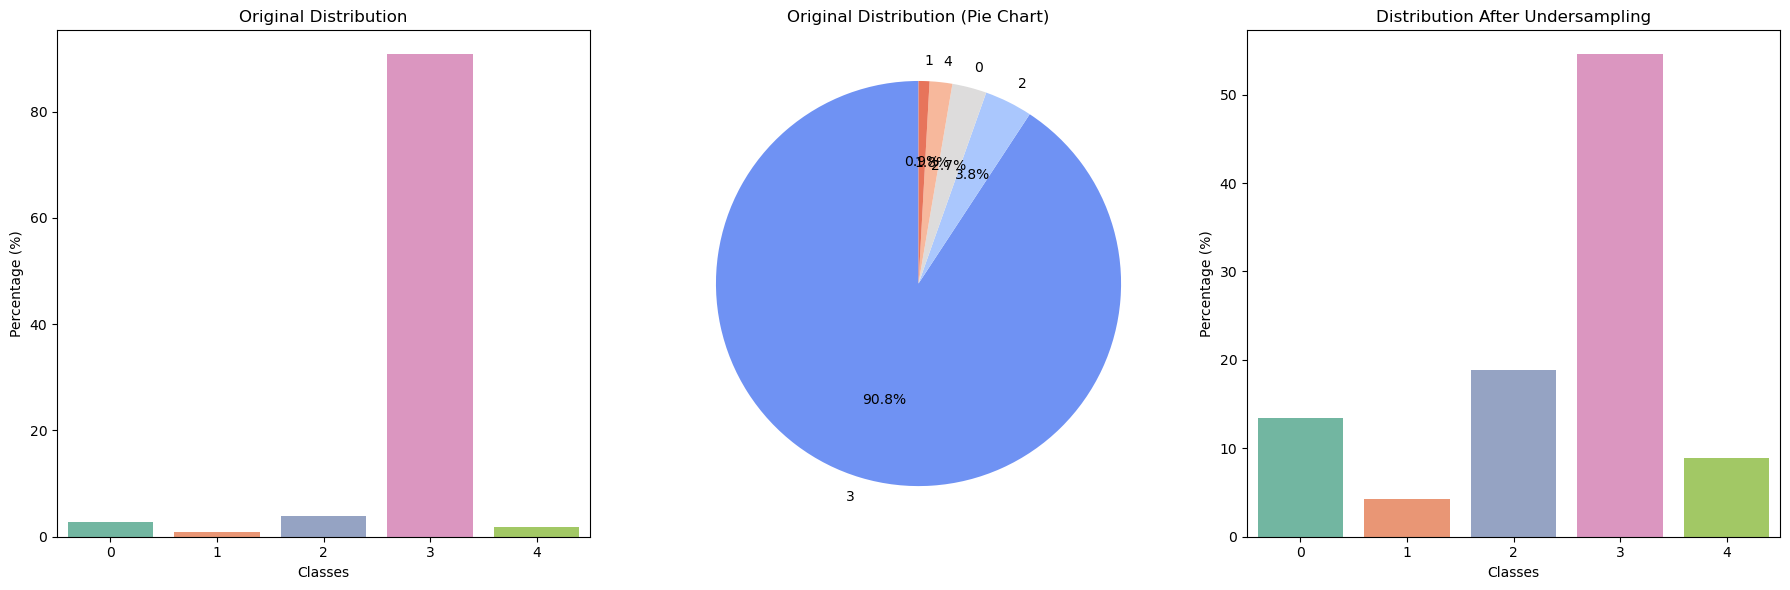

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Original Distribution (Bar Chart)
plt.subplot(1, 3, 1)
sns.barplot(x=original_dist.index, y=original_dist.values, hue=original_dist.index, palette="Set2", legend=False)
plt.title("Original Distribution")
plt.xlabel("Classes")
plt.ylabel("Percentage (%)")

# Original Distribution (Pie Chart)
plt.subplot(1, 3, 2)
plt.pie(original_dist, labels=original_dist.index, autopct="%1.1f%%", startangle=90,
        colors=sns.color_palette("coolwarm", len(original_dist)))
plt.title("Original Distribution (Pie Chart)")

# Distribution After Undersampling (Bar Chart)
plt.subplot(1, 3, 3)
sns.barplot(x=under_dist.index, y=under_dist.values, hue=under_dist.index, palette="Set2", legend=False)
plt.title("Distribution After Undersampling")
plt.xlabel("Classes")
plt.ylabel("Percentage (%)")

plt.tight_layout()
plt.show()



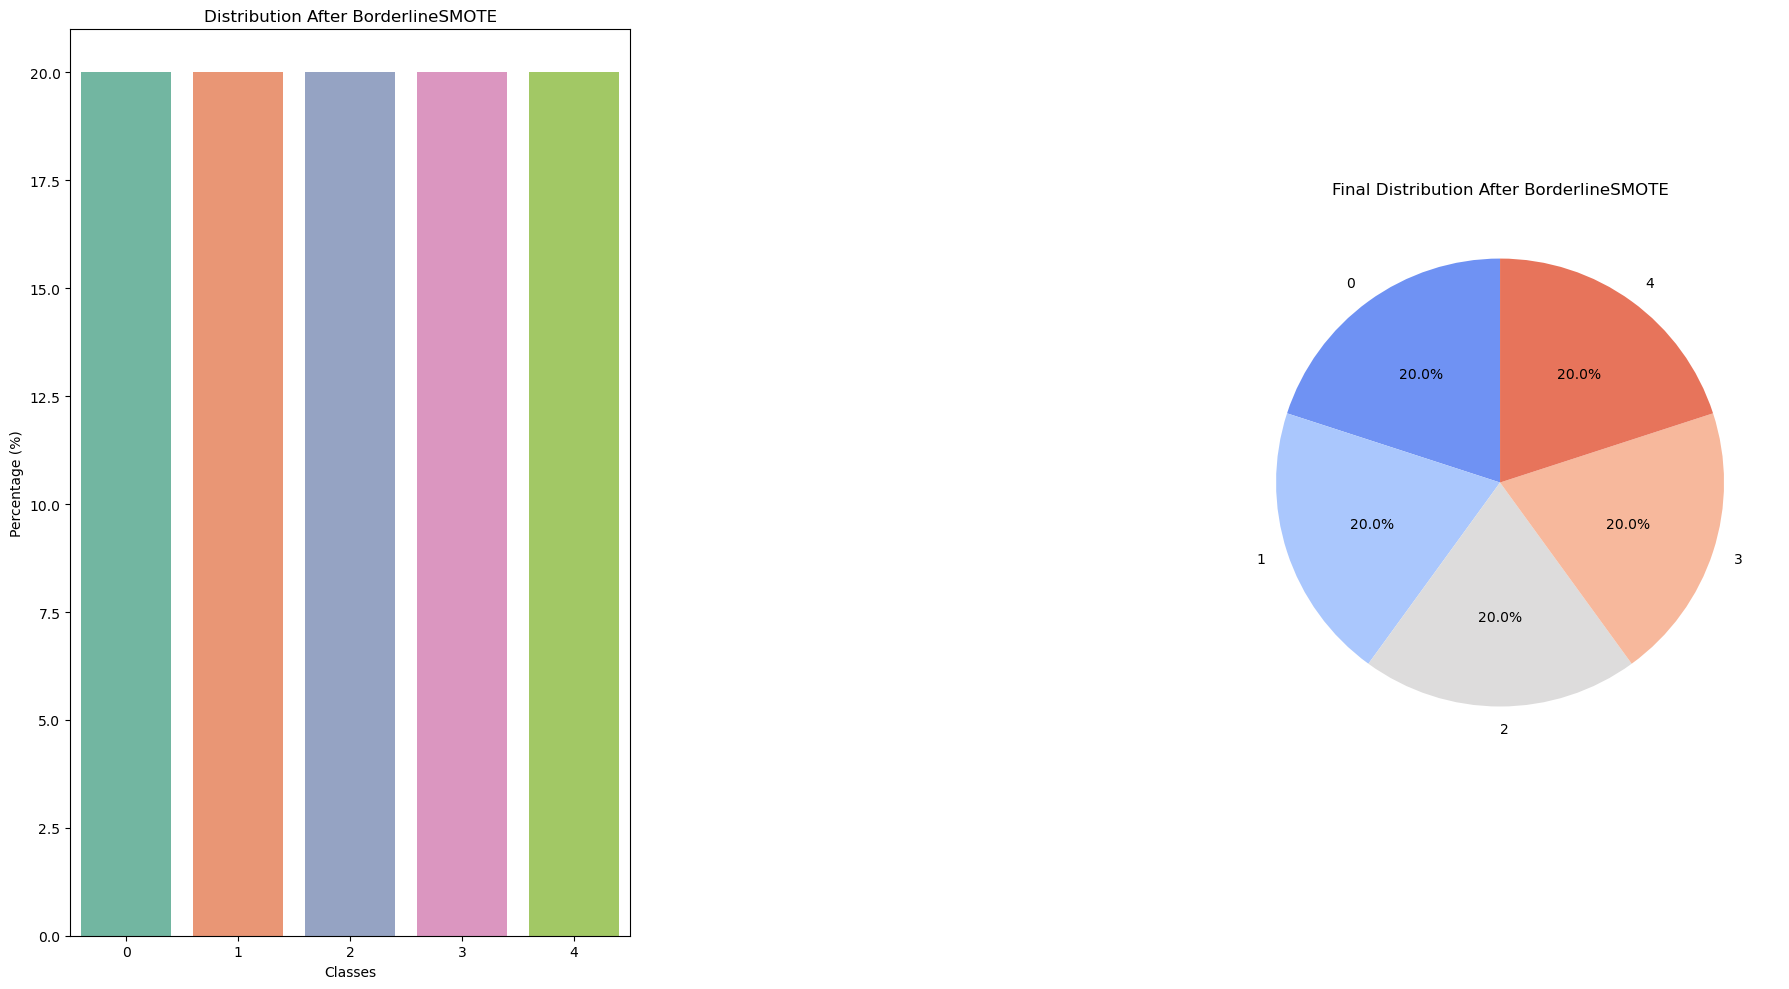

In [40]:

plt.figure(figsize=(18, 10))
# Final Distribution Bar Plot (Improved Colors)
plt.subplot(1, 3, 1)
sns.barplot(x=final_dist.index, y=final_dist.values, hue=final_dist.index, palette="Set2", legend=False)
plt.title("Distribution After BorderlineSMOTE")
plt.xlabel("Classes")
plt.ylabel("Percentage (%)")

# Final Distribution Pie Chart (Balanced Colors)
plt.subplot(1, 3, 3)
plt.pie(final_dist, labels=final_dist.index, autopct="%1.1f%%", startangle=90,
        colors=sns.color_palette("coolwarm", len(final_dist)))
plt.title("Final Distribution After BorderlineSMOTE")

plt.tight_layout()
plt.show()

#### 1-using the data balanced using SMOTE

In [41]:
#X_multi_train = X_resampled_adasyn
#y_multi_train = y_resampled_adasyn
X_multi_train = X_resampled_smote
y_multi_train = y_resampled_smote

##### using random forest to reduce the number of feauters

In [42]:


# Train Random Forest
rf = RandomForestClassifier()
start_time = time.time()

rf.fit(X_multi_train, y_multi_train)

training_time_rf = (time.time() - start_time) / 60
print(f'training time: {training_time_rf}')


# Get feature importance
importance = rf.feature_importances_
feature_names = X_multi_train.columns

# Print feature importance
for name, score in zip(feature_names, importance):
    print(f"{name}: {score:.4f}")
    





training time: 0.22464051644007366
 id: 0.0389
 Time: 0.0396
 Is_CH: 0.0726
 Dist_To_CH: 0.0134
 ADV_S: 0.1797
 ADV_R: 0.0502
 JOIN_S: 0.0209
 JOIN_R: 0.0343
 SCH_S: 0.1589
Rank: 0.0330
 DATA_S: 0.0578
 DATA_R: 0.0417
 Data_Sent_To_BS: 0.0917
 dist_CH_To_BS: 0.0730
 send_code : 0.0198
Expaned Energy: 0.0747


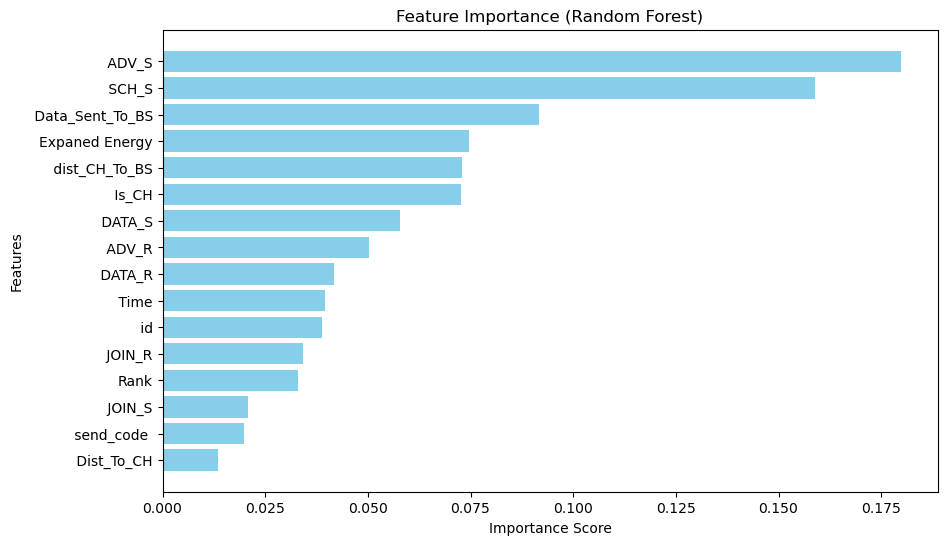

Selected Features: [' id', ' Time', ' Is_CH', ' ADV_S', ' ADV_R', ' JOIN_R', ' SCH_S', 'Rank', ' DATA_S', ' DATA_R', ' Data_Sent_To_BS', ' dist_CH_To_BS', 'Expaned Energy']


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting feature importances for better visualization
features_sorted = sorted(zip(X.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)
feature_names, importance_values = zip(*features_sorted)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

# Filter features with importance > threshold (e.g., 0.03)
important_features = [feature for feature, importance in zip(X.columns, rf.feature_importances_) if importance > 0.03]
X_selected = X[important_features]

print("Selected Features:", important_features)

In [44]:
X_multi_train=X_multi_train[important_features]
X_multi_test=X_multi_test[important_features]

In [45]:
#we will use the minmax scaler because its better when we use data thats have mening and we want to use models like svm and decision tree and others 

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_multi_train)
X_test_scaled = scaler.fit_transform(X_multi_test)

#shape the data in to a frame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_multi_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_multi_test.columns)
X_train_scaled

,id,Time,Is_CH,ADV_S,ADV_R,JOIN_R,SCH_S,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,Expaned Energy
0,0.001212,0.057183,1.0,0.010309,0.034188,0.129032,0.010101,0.000000,0.000000,0.729223,0.000000,0.000000,0.000161
1,0.121218,0.817746,1.0,0.010309,0.034188,0.064516,0.010101,0.000000,0.000000,0.595174,0.000000,0.000000,0.000145
2,0.122726,0.747324,1.0,0.010309,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014857
3,0.484838,0.606479,1.0,0.010309,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095
4,0.272745,0.916338,1.0,0.010309,0.205128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162370,0.121521,0.831831,1.0,0.010309,0.094017,0.016129,0.020202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000144
162371,0.031233,0.320563,1.0,0.010309,0.042735,0.048387,0.060606,0.000000,0.000000,0.264745,0.526971,0.545927,0.051978
162372,0.060931,0.536056,1.0,0.010309,0.025641,0.145161,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000158
162373,0.152129,0.981127,1.0,0.010309,0.025641,0.080645,0.101010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000145


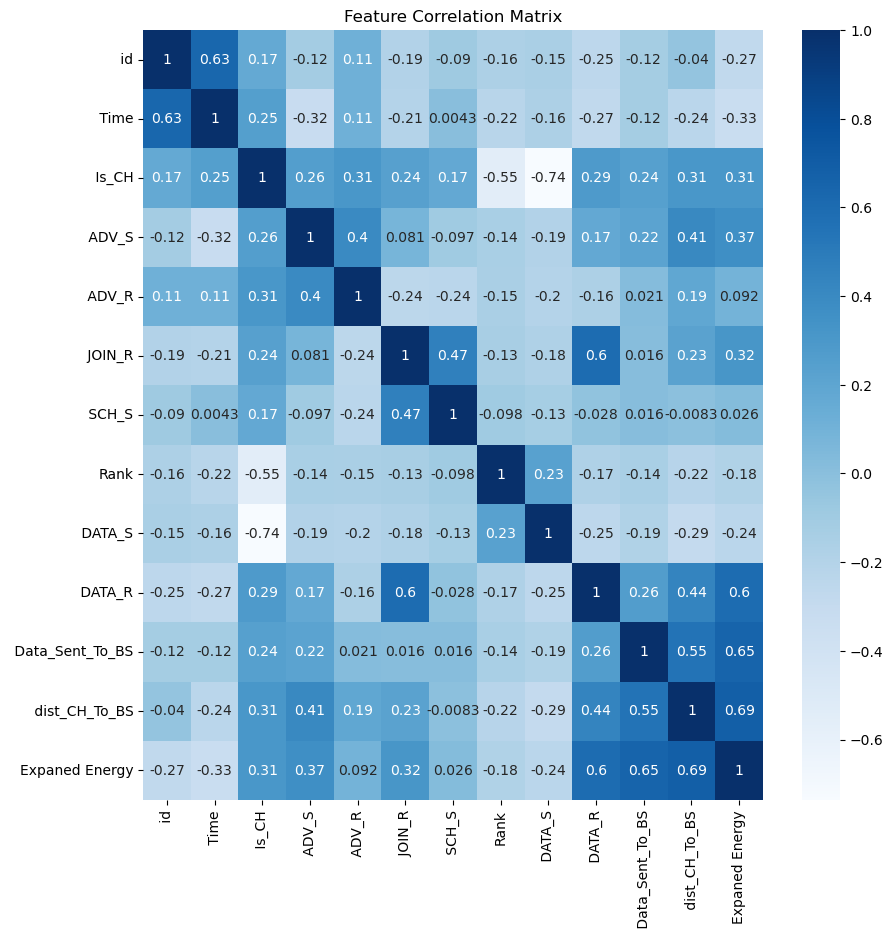

In [46]:
crr_matrix=X_train_scaled.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(crr_matrix, cmap='Blues', annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

#### PCA for SVM

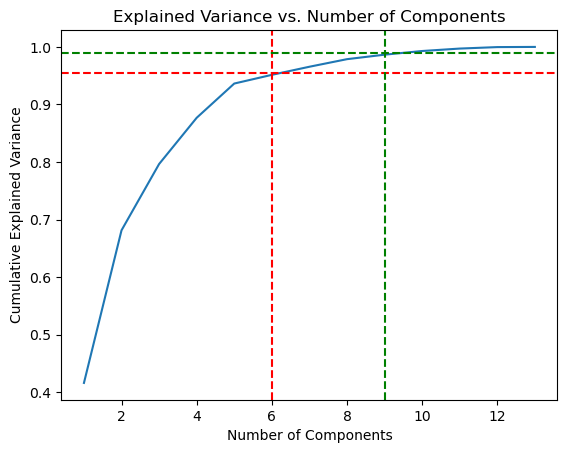

In [47]:
pcam = PCA()  # specifing the number of components after locking at the Explained Variance vs. Number of Components 
pcam.fit(X_train_scaled)

explained_variance_ratio = pcam.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance)
plt.axhline(y=0.955, color='r', linestyle='--')
plt.axvline(x=6, color='r', linestyle='--') 
plt.axhline(y=0.99, color='g', linestyle='--')
plt.axvline(x=9, color='g', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

n_components_m = 9

In [48]:
pcam = PCA(n_components=n_components_m)
X_train_pcam = pcam.fit_transform(X_train_scaled)
X_test_pcam = pcam.transform(X_test_scaled)
pcam_df_train = pd.DataFrame(X_train_pcam, columns=[f'PC_{i+1}' for i in range(n_components_m)])
pcam_df_test = pd.DataFrame(X_test_pcam, columns=[f'PC_{i+1}' for i in range(n_components_m)])

print("Final Shapes:")
print("X_train PCA:", pcam_df_train.shape)
print("X_test PCA:", pcam_df_test.shape)

Final Shapes:
X_train PCA: (162375, 9)
X_test PCA: (73154, 9)


### Models Training :

##### 1-SVM

In [49]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'rbf', random_state = 0)
start_time = time.time()
SVM_classifier.fit(pcam_df_train, y_multi_train)
training_time_svm = (time.time() - start_time) / 60

ym_pred_svm = SVM_classifier.predict(pcam_df_test)

In [50]:
cmm = confusion_matrix(y_multi_test, ym_pred_svm)
print(cmm)
accuracy_score(y_multi_test,ym_pred_svm)
accuracym_svm = accuracy_score(y_multi_test,ym_pred_svm)
balancedm_accuracy_svm = balanced_accuracy_score(y_multi_test, ym_pred_svm)


[[ 1162     0   851     0     5]
 [    0   608     1     0     0]
 [  254     8  2445     0     3]
 [    0   402   757 64804   522]
 [    0     0     7    90  1235]]


In [51]:
print(f'training time: {training_time_svm:.4f}minutes')
print(f"Accuracy :        {accuracym_svm:.2%}")
print(f"Accuracy balance: {balancedm_accuracy_svm:.2%}")

training time: 1.1269minutes
Accuracy :        96.04%
Accuracy balance: 87.57%


##### 2-Decision Tree

In [52]:
dtm_model = DecisionTreeClassifier(max_depth=5,criterion ="entropy")
start_time = time.time()
dtm_model.fit(X_train_scaled, y_multi_train)
training_time_dtm = (time.time() - start_time) / 60
print(f'training time: {training_time_dtm:.4f} minutes')
y_pred_dtm = dtm_model.predict(X_test_scaled)
accuracy_dtm = accuracy_score(y_multi_test, y_pred_dtm)
balanced_accuracy_dtm = balanced_accuracy_score(y_multi_test, y_pred_dtm)

# Display results
print(f"\nDecision Tree Model Evaluation:")
print(f"-------------------------------")
print(f"Model Accuracy: {accuracy_dtm:.2%}")  
print(f"Balanced Accuracy: {balanced_accuracy_dtm:.2%}")

training time: 0.0057 minutes

Decision Tree Model Evaluation:
-------------------------------
Model Accuracy: 95.99%
Balanced Accuracy: 90.46%


##### 3-Random Forest

In [53]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy', random_state=42)

# Train the model
start_time = time.time()
rf_model.fit(X_train_scaled, y_multi_train)
training_time_rf = (time.time() - start_time) / 60
print(f'Training time: {training_time_rf:.4f} minutes')

# Make predictions
ym_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rfm = accuracy_score(y_multi_test, ym_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_multi_test, ym_pred_rf)

# Display results
print(f"\nRandom Forest Model Evaluation:")
print(f"-------------------------------")
print(f"Model Accuracy: {accuracy_rfm:.2%}")  
print(f"Balanced Accuracy: {balanced_accuracy_rf:.2%}")

Training time: 0.1142 minutes

Random Forest Model Evaluation:
-------------------------------
Model Accuracy: 95.88%
Balanced Accuracy: 89.19%


##### 4-XGBoost

In [54]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees
    max_depth=5,  # Limit tree depth for better generalization
    learning_rate=0.1,  # Step size in boosting
    objective="multi:softmax",  # Multi-class classification
    num_class=5,  # we have 5 attack types
    random_state=42
)
start_time = time.time()
xgb_model.fit(X_train_scaled, y_multi_train)
training_time_xgb = (time.time() - start_time) / 60
print(f'training time: {training_time_xgb:.4f}minutes')
yxgb_pred = xgb_model.predict(X_test_scaled)



training time: 0.0200minutes


In [55]:
accuracyxgb = accuracy_score(y_multi_test, yxgb_pred)
balanced_accuracy_xgb = balanced_accuracy_score(y_multi_test, yxgb_pred)
print(f"XGBoost Model Accuracy: {accuracyxgb:.2%}")
print(f"Balanced Accuracy: {balanced_accuracy_xgb:.2%}")

print("\nClassification Report:")
print(classification_report(y_multi_test, yxgb_pred))


XGBoost Model Accuracy: 98.86%
Balanced Accuracy: 97.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2018
           1       0.90      1.00      0.95       609
           2       0.89      0.98      0.93      2710
           3       1.00      0.99      0.99     66485
           4       0.81      0.93      0.87      1332

    accuracy                           0.99     73154
   macro avg       0.91      0.98      0.94     73154
weighted avg       0.99      0.99      0.99     73154



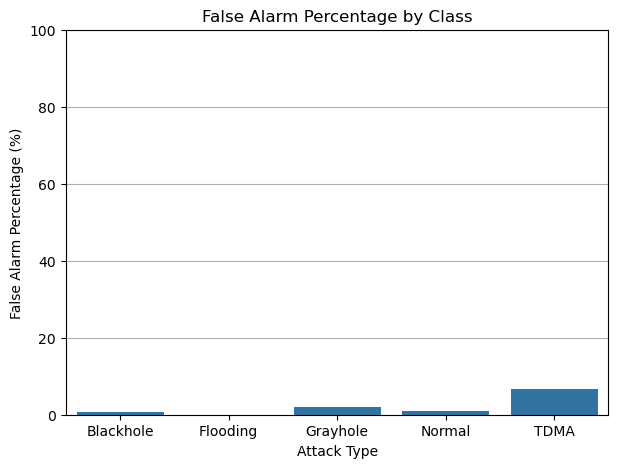

In [57]:
# Calculate confusion matrix
cm = confusion_matrix(y_multi_test, yxgb_pred)

# Calculate false alarms (misclassifications)
false_alarms = cm.sum(axis=1) - cm.diagonal()
total_predictions = cm.sum(axis=1)
false_alarm_percentage = (false_alarms / total_predictions) * 100

# Class labels
class_labels = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']

# Create a DataFrame for plotting
false_alarm_data = pd.DataFrame({
    'Class': class_labels,
    'False Alarm Percentage': false_alarm_percentage
})

# Plotting the false alarm percentage
plt.figure(figsize=(7, 5))
sns.barplot(x='Class', y='False Alarm Percentage', data=false_alarm_data)

plt.title('False Alarm Percentage by Class')
plt.xlabel('Attack Type')
plt.ylabel('False Alarm Percentage (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

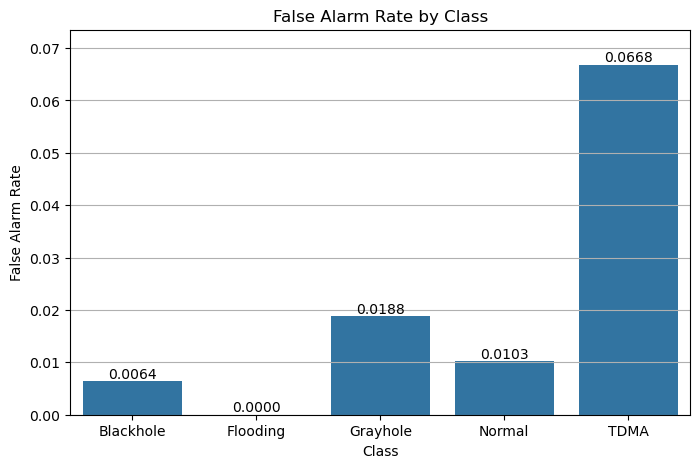

In [58]:
cm = confusion_matrix(y_multi_test, yxgb_pred)

# Calculate false alarms (misclassifications)
false_alarms = cm.sum(axis=1) - cm.diagonal()
total_predictions = cm.sum(axis=1)

# Avoid division by zero
total_predictions[total_predictions == 0] = 1  # Replace 0 with 1 to avoid division by zero

# Calculate false alarm rate
false_alarm_rate = false_alarms / total_predictions

# Class labels
class_labels = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']

# Create a DataFrame for plotting
false_alarm_df = pd.DataFrame({
    'Class': class_labels,
    'False Alarm Rate': false_alarm_rate
})

# Plotting the false alarm rate
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='False Alarm Rate', data=false_alarm_df)

# Adding the numerical values on top of the bars
for index, value in enumerate(false_alarm_rate):
    plt.text(index, value, f"{value:.4f}", ha='center', va='bottom')

plt.title('False Alarm Rate by Class')
plt.xlabel('Class')
plt.ylabel('False Alarm Rate')
plt.ylim(0, max(false_alarm_rate) * 1.1)  # Extend y limit for better spacing
plt.grid(axis='y')
plt.show()

In [59]:

# Confusion Matrix
# Ensure that y_multi_test is also encoded
y_multi_test_encoded = label_encoder.transform(y_multi_test)  # Encode the test labels

cm = confusion_matrix(y_multi_test_encoded, yxgb_pred)

# Class labels for confusion matrix visualization
class_labels = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']

# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

ValueError: y contains previously unseen labels: 0

C:\Users\chibr\AppData\Local\Temp\ipykernel_15264\2830646265.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Precision', data=precision_df, palette='Blues', hue=None)


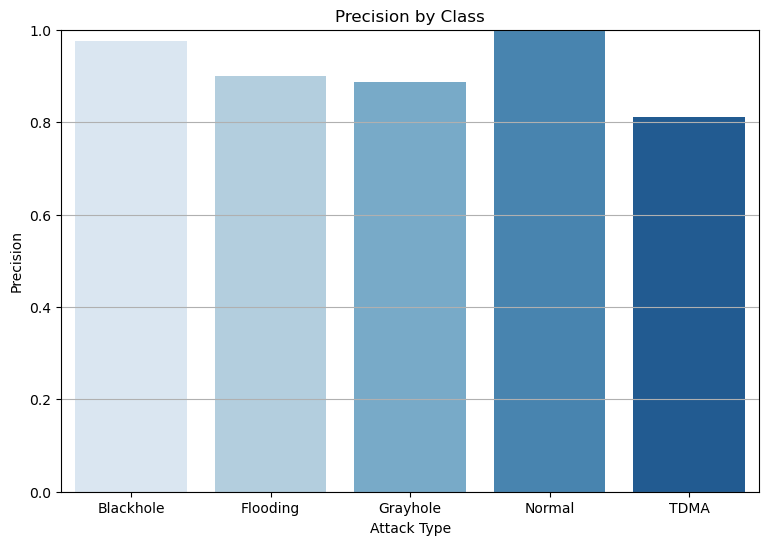

In [60]:
# Calculate precision for each class
precision_per_class = cm.diagonal() / cm.sum(axis=0)

# Class labels
class_labels = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']

# Create a DataFrame for plotting
precision_df = pd.DataFrame({
    'Class': class_labels,
    'Precision': precision_per_class
})

# Plotting the precision
plt.figure(figsize=(9, 6))
sns.barplot(x='Class', y='Precision', data=precision_df, palette='Blues', hue=None)

plt.title('Precision by Class')
plt.xlabel('Attack Type')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [61]:
f1_xgb = f1_score(y_multi_test, yxgb_pred, average="weighted")
f1_rfm = f1_score(y_multi_test, ym_pred_rf, average="weighted")
f1_dtm = f1_score(y_multi_test, y_pred_dtm, average="weighted")
f1_svmm = f1_score(y_multi_test, ym_pred_svm, average="weighted")



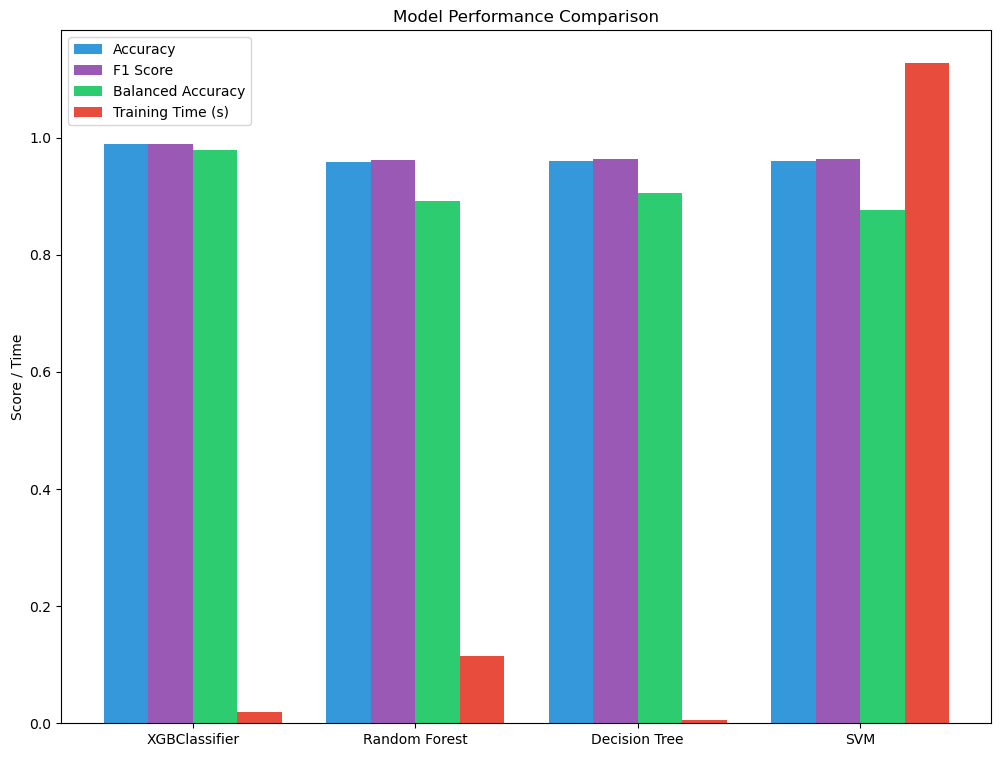

In [62]:




models = ["XGBClassifier","Random Forest", "Decision Tree", "SVM"]

accuracym = np.array([accuracyxgb,accuracy_rfm, accuracy_dtm, accuracym_svm])
f1_scoresm = np.array([f1_xgb, f1_rfm, f1_dtm, f1_svmm])
training_timem = np.array([training_time_xgb, training_time_rf, training_time_dtm, training_time_svm])
balanced_accuracym = np.array([balanced_accuracy_xgb, balanced_accuracy_rf, balanced_accuracy_dtm, balancedm_accuracy_svm])

# Create bar width and positions
x = np.arange(len(models))
width = 0.2  # Adjusted width to fit all bars correctly

# Plot bars
fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(x - 1.5 * width, accuracym, width, label="Accuracy", color="#3498db")  # Deep Blue
ax.bar(x - 0.5 * width, f1_scoresm, width, label="F1 Score", color="#9b59b6")  # Purple
ax.bar(x + 0.5 * width, balanced_accuracym, width, label="Balanced Accuracy", color="#2ecc71")  # Green
ax.bar(x + 1.5 * width, training_timem, width, label="Training Time (s)", color="#e74c3c")  # Red

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("Score / Time")
ax.set_title("Model Performance Comparison")
ax.legend()

# Show plot
plt.show()

##### Saving the trained models

In [63]:
joblib.dump(dtm_model, "multi-attack-models/Decision_Tree_Multi_attack_classifier.joblib")
joblib.dump(SVM_classifier, "multi-attack-models/SVM_Multi_attack_classifier.joblib")
joblib.dump(xgb_model, "multi-attack-models/xgboost_attack_classifier.joblib")
joblib.dump(rf_model, "multi-attack-models/Random_Forest_attack_classifier.joblib")

['multi-attack-models/Random_Forest_attack_classifier.joblib']

In [67]:
X_test_scaled.to_csv("multi-attack-models/X_multi_test.csv", index=False)
y_multi_test.to_csv("multi-attack-models/y_multi_test.csv", index=False)